# ノック1: データを読み込んでみよう

In [7]:
import pandas as pd

In [8]:
customer_master = pd.read_csv('customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [11]:
item_master = pd.read_csv('item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [12]:
transaction_1 = pd.read_csv('transaction_1.csv')
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [15]:
transaction_detail_1 = pd.read_csv('transaction_detail_1.csv')
transaction_detail_1.head(3)

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1


# ノック2: データを結合(ユニオン)してみよう

In [28]:
transaction_2 = pd.read_csv('transaction_2.csv')
# transaction_1 と transaction_2 をユニオン
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
assert len(transaction) == len(transaction_1) + len(transaction_2)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [29]:
transaction_detail_2 = pd.read_csv('transaction_detail_2.csv')
# transaction_detail_1 と transaction_detail_2 をユニオン
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
assert len(transaction_detail) == len(transaction_detail_1) + len(transaction_detail_2)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


# ノック3: 売上データ同士を結合(ジョイン)してみよう

主軸に置くデータは最も粒度が細かい`transaction_detail`とする

まずは売上データをジョインしていきますが、

1. 足りない(付加したい)データ列は何か？
1. 共通するデータ列は何か？

を考える

=> 今回の場合、付加したいデータは`transaction`の`payment_date`と`customer_id`。<br>
   共通するデータ列は`transaction_id`。

In [40]:
joined_data = pd.merge(
    left=transaction_detail,
    right=transaction.loc[:, ['transaction_id', 'payment_date', 'customer_id']],
    on='transaction_id',
    how='left'
)
joined_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [43]:
print('Data length')
print('transaction_detail:', len(transaction_detail))
print('transaction:', len(transaction))
print('joined_data:', len(joined_data))

Data length
transaction_detail: 7144
transaction: 6786
joined_data: 7144


# ノック4: マスターデータを結合(ジョイン)してみよう

ノック3で作成した結合データに対し、マスターデータ(customer_master, item_master)をジョインしてみます。

1. 足りない(付加したい)データ列は何か？
1. 共通するデータ列は何か？

=> customer_master, item_master に含まれる全て。<br>
共通するデータ列はそれぞれcustomer_idとitem_id

In [45]:
# customer_master をジョイン
joined_data = pd.merge(
    left=joined_data,
    right=customer_master,
    on='customer_id',
    how='left'
)
joined_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県


In [47]:
# item_master をジョイン
joined_data = pd.merge(
    left=joined_data,
    right=item_master,
    on='item_id',
    how='left'
)
joined_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000


# ノック5: 必要なデータ列を作ろう

ここまでで4種類6個のデータを1つに結合し、分析できるデータに整形できました。

しかし、結合した影響で売り上げ(price)の情報が落ちてしまっているので、売上を計算する必要があります。

In [48]:
# 「売上」(price)列 を追加する
joined_data['price'] = joined_data['item_price'] * joined_data['quantity']
joined_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price,price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000,170000


# ノック6: データ検算をしよう

In [50]:
print(joined_data['price'].sum())
print(transaction['price'].sum())

971135000
971135000


# ノック7: 各種統計量を把握しよう

In [52]:
# 欠損している値の状況
joined_data.isnull().sum()

detail_id             0
transaction_id        0
item_id               0
quantity              0
payment_date          0
customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
item_name             0
item_price            0
price                 0
dtype: int64

In [54]:
# 全体の数時間の把握
joined_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [58]:
# データの期間を把握
print('Min date:', joined_data['payment_date'].min())
print('Max date:', joined_data['payment_date'].max())

Min date: 2019-02-01 01:36:57
Max date: 2019-07-31 23:41:38


# ノック8: 月別でデータを集計してみよう

In [60]:
# データ型を確認
# payment_date 列は object 型 (= 文字列)
joined_data.dtypes

detail_id              int64
transaction_id        object
item_id               object
quantity               int64
payment_date          object
customer_id           object
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
item_name             object
item_price             int64
price                  int64
dtype: object

In [62]:
# payment_date 列を datetime 型に変換する
joined_data['payment_date'] = pd.to_datetime(joined_data['payment_date'])
# 月ごとの集計列を追加する
joined_data['payment_month'] = joined_data['payment_date'].dt.strftime('%Y%m')
joined_data.loc[:, ['payment_date', 'payment_month']].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [65]:
# 月毎の売上を集計
joined_data.groupby('payment_month').sum()

,detail_id,quantity,age,item_price,price
payment_month,,,,,
201902,676866,1403,59279,142805000,160185000
201903,2071474,1427,58996,142980000,160370000
201904,3476816,1421,59246,143670000,160510000
201905,4812795,1390,58195,139655000,155420000
201906,6369999,1446,61070,147090000,164030000
201907,8106846,1485,62312,153215000,170620000


# ノック9: 月別、商品別でデータを集計してみよう

In [66]:
# 月別かつ商品別に売上集計をしてみる
joined_data.groupby(
    ['payment_month', 'item_id']
).sum()

detail_id  quantity    age  item_price     price
payment_month item_id                                                  
201902        S001        192357       483  17274    16700000  24150000
              S002        138010       297  11928    20145000  25245000
              S003         81497       165   7727    18240000  19800000
              S004         91435       173   8377    29340000  31140000
              S005        173567       285  13973    58380000  59850000
201903        S001        635721       520  18300    18200000  26000000
              S002        413971       300  12084    20230000  25500000
              S003        245842       159   7178    17160000  19080000
              S004        247832       143   6719    25020000  25740000
              S005        528108       305  14715    62370000  64050000
201904        S001       1076125       518  18198    18450000  25900000
              S002        638789       276  10926    18360000  23460000
              S003        496212       183   8203    20160000  21960000
              S004        368204       135   6340    22860000  24300000
              S005        897486       309  15579    63840000  64890000
201905        S001       1487314       497  18040    18100000  24850000
              S002        990251       298  12080    20485000  25330000
              S003        631230       171   7466    18480000  20520000
              S004        567773       144   6913    24840000  25920000
              S005       1136227       280  13696    57750000  58800000
201906        S001       1874692       520  18426    17750000  26000000
              S002       1229074       282  11613    19720000  23970000
              S003        891651       182   8644    20040000  21840000
              S004        792209       160   7195    27000000  28800000
              S005       1582373       302  15192    62580000  63420000
201907        S001       2339702       505  17941    17950000  25250000
              S002       1727205       332  13591    22525000  28220000
              S003        946483       162   7060    17400000  19440000
              S004        912353       145   6851    25200000  26100000
              S005       2181103       341  16869    70140000  71610000

In [68]:
# ピボットデーブルで表示する
pd.pivot_table(
    joined_data,
    index='item_name',
    columns='payment_month',
    values=['price', 'quantity'],
    aggfunc='sum'
)

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

# ノック10: 商品別の売上推移を可視化してみよう

In [69]:
graph_data = pd.pivot_table(
    joined_data,
    index='payment_month',
    columns='item_name',
    values='price',
    aggfunc='sum'
)
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


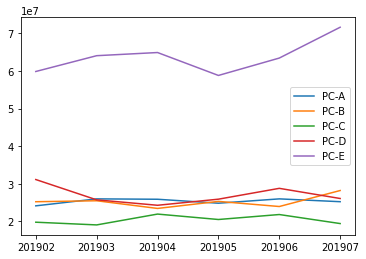

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

# 商品ごとの売り上げグラフを描画する
for c in graph_data.columns:
    plt.plot(list(graph_data.index), graph_data[c], label=c)

plt.legend()